# Random Forest
Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

StatQuest Explanation: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

Randon Forest for **Regression** and **Classification**:
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn

## Exercise
(Binary Classification)

### Banknote Authentication
Dataset Source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.

#### Attribute Information

1. Variance of Wavelet Transformed image (continuous)
2. Skewness of Wavelet Transformed image (continuous)
3. Curtosis of Wavelet Transformed image (continuous)
4. Entropy of image (continuous)

Class (target). 0 for genuine and 1 for forged

### Data Preparation

In [278]:
import pandas

df = pandas.read_csv('datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Training

In [279]:
from sklearn.model_selection import train_test_split

features = df[['variance', 'skewness', 'curtosis', 'entropy']]
labels = df['class']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [280]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, oob_score=True, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [281]:
# Score of the training dataset obtained using an out-of-bag estimate
clf.oob_score_

0.99179580674567

### Testing

In [282]:
y_prediction = clf.predict(X_test)
clf.score(X_test, y_test)

0.9890909090909091

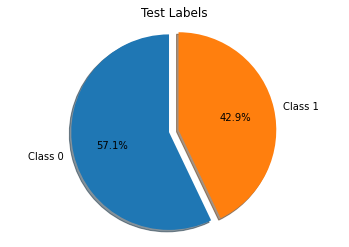

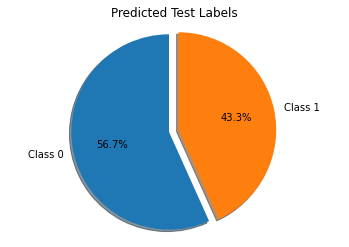

In [283]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pie(values, title):
    pie_labels = 'Class 0', 'Class 1'
    pie_values = values
    pie_explode = [0, 0.1]

    fig1, ax1 = plt.subplots()
    ax1.pie(pie_values, explode=pie_explode, labels=pie_labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

plot_pie([len(np.where(y_test == 0)[0]), len(np.where(y_test == 1)[0])], 'Test Labels')
plot_pie([len(np.where(y_prediction == 0)[0]), len(np.where(y_prediction == 1)[0])], 'Predicted Test Labels')

### Validation

#### Confusion Matrix

Count 0:  157
Count 1:  118


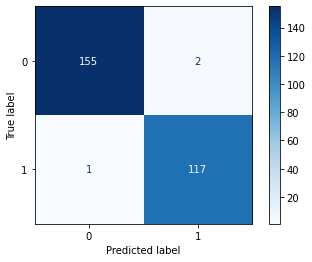

In [284]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

print('Count 0: ', len(np.where(y_test == 0)[0]))
print('Count 1: ', len(np.where(y_test == 1)[0]))

#### Metrics

In [289]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_prediction))
print(accuracy_score(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


In [286]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 0.01090909090909091
Mean Squared Error: 0.01090909090909091
Root Mean Squared Error: 0.1044465935734187
